# 本节大纲
1. **范数与权重衰减**
    * 在训练参数化机器学习模型时，权重衰减（通常称为 L2 正则化）是最广泛使用的正则化的技术之一。
    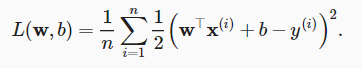
    * 通过正则化常数 λ 来描述这种权衡，这是一个非负超参数
    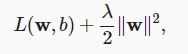
    * L2 正则化回归的小批量随机梯度下降更新如下式：
    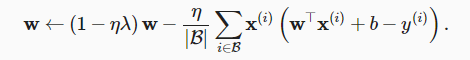
    
***
2. **高维线性回归**
***
3. **从零开始实现**
    * 初始化模型参数
    * 定义L_2范数惩罚
    * 定义训练代码实现
    * 忽略正则化直接训练
    * 使用权重衰减
***
4. **简洁实现**
***
5. **小结**


In [18]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
'''首先，我们像以前一样生成一些数据，生成公式如下：'''
# y=0.05+∑i=1d0.01xi+ϵ where ϵ∼N(0,0.012).

n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [5]:
'''定义一个函数实现模型参数初始化'''
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [4]:
'''定义 L2 范数惩罚'''
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2


In [6]:
'''定义训练代码实现'''
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                # 增加了L2范数惩罚项，广播机制使l2_penalty(w)成为一个长度为`batch_size`的向量。
                l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())


w的L2范数是： 0.39862769842147827


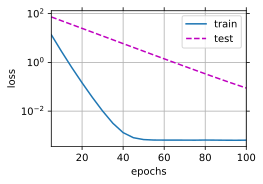

In [20]:
train(lambd=3)

In [11]:
'''简洁版实现'''
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减。
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 13.321718215942383


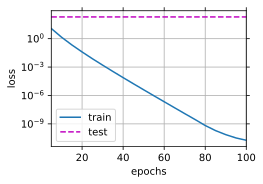

In [21]:
train_concise(0)